<a href="https://colab.research.google.com/github/bhatimukul/Assignment-func/blob/main/SVM_%26_Naive_bayes_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Theoretical**

---



Q1. What is a Support Vector Machine (SVM)?

Ans.A **Support Vector Machine (SVM)** is a supervised learning algorithm used for **classification** and **regression** tasks. It is particularly effective for classification problems, especially when dealing with high-dimensional data.

### **How SVM Works:**
1. **Finding the Optimal Hyperplane**  
   - SVM finds the best decision boundary (hyperplane) that **maximizes the margin** between different classes.
   - The margin is the distance between the hyperplane and the nearest data points from each class. These closest points are called **support vectors**.

2. **Linear vs. Non-Linear Classification**  
   - If the data is **linearly separable**, SVM finds a straight hyperplane.
   - If the data is **not linearly separable**, SVM uses a technique called the **Kernel Trick** to transform data into a higher-dimensional space where it becomes linearly separable.

### **Key Concepts:**
- **Support Vectors**: Data points that lie closest to the hyperplane and influence its position.
- **Margin**: The gap between the hyperplane and the nearest data points from either class.
- **Kernel Trick**: A mathematical function that allows SVM to work in higher-dimensional spaces without explicitly transforming the data.

### **Common Kernel Functions in SVM:**
- **Linear Kernel**: \( K(x, y) = x \cdot y \) (used when data is linearly separable)
- **Polynomial Kernel**: \( K(x, y) = (x \cdot y + c)^d \)
- **Radial Basis Function (RBF) Kernel**: \( K(x, y) = e^{-\gamma ||x - y||^2} \) (commonly used for complex datasets)
- **Sigmoid Kernel**: \( K(x, y) = \tanh(\alpha x \cdot y + c) \)

### **Advantages of SVM:**
✔ Works well with high-dimensional data  
✔ Effective when the number of dimensions is greater than the number of samples  
✔ Robust against overfitting (especially with proper kernel selection)

### **Disadvantages of SVM:**
✘ Computationally expensive for large datasets  
✘ Requires careful tuning of kernel functions and hyperparameters  
✘ Does not perform well when there is significant overlap between classes  


Q2.What is the difference between Hard Margin and Soft Margin SVM?

Ans.The difference between **Hard Margin** and **Soft Margin** SVM lies in how strictly the model enforces class separation.

### **1. Hard Margin SVM**
- Assumes that the data is **perfectly separable**.
- Finds a **hyperplane** that completely separates the classes **without allowing any misclassification**.
- Maximizes the **margin** (distance between the hyperplane and the closest data points).
- Works well only when data is **clean and linearly separable**.
- **Downside**: If the data has noise or overlap between classes, Hard Margin SVM **fails**.

🔹 **Mathematical Formulation:**
\[
\min \frac{1}{2} ||w||^2
\]
Subject to:  
\[
y_i (w \cdot x_i + b) \geq 1, \quad \forall i
\]
(where \( y_i \) are class labels, \( x_i \) are data points, and \( w, b \) define the hyperplane)

---

### **2. Soft Margin SVM**
- Allows some **misclassification** (some points can be on the wrong side of the margin).
- Introduces a **slack variable** \( \xi_i \) to **penalize misclassified points**.
- Works well when the data **is not perfectly separable** or has some **noise**.
- Provides a balance between **margin size** and **classification accuracy**.

🔹 **Mathematical Formulation:**
\[
\min \frac{1}{2} ||w||^2 + C \sum \xi_i
\]
Subject to:  
\[
y_i (w \cdot x_i + b) \geq 1 - \xi_i, \quad \forall i
\]
(where \( \xi_i \geq 0 \), and \( C \) is a regularization parameter controlling the trade-off between margin size and misclassification).

---

### **Key Differences:**
| Feature            | Hard Margin SVM | Soft Margin SVM |
|--------------------|----------------|----------------|
| **Misclassification** | Not allowed | Allowed (controlled by \( C \)) |
| **Data Separability** | Requires perfect separation | Works with overlapping data |
| **Robustness to Noise** | Not robust | Robust |
| **Regularization Parameter \( C \)** | Not needed | Needed to balance margin and errors |

🔹 **When to Use What?**  
- **Use Hard Margin SVM** if data is perfectly separable.  
- **Use Soft Margin SVM** when dealing with noisy or non-linearly separable data.


Q3.What is the mathematical intuition behind SVM?

Ans.### **Mathematical Intuition Behind SVM**  

Support Vector Machine (SVM) is based on the idea of finding a **hyperplane** that best separates data points into different classes while maximizing the margin between them.

---

## **1. Defining the Hyperplane**  
In an **n-dimensional space**, a **hyperplane** is defined as:

\[
w \cdot x + b = 0
\]

where:  
- \( w \) is the **weight vector** (normal to the hyperplane),
- \( x \) is the **input feature vector**,
- \( b \) is the **bias** (offset from the origin).

For a classification problem, we want:

\[
w \cdot x + b \geq 1 \quad \text{for } y = +1
\]

\[
w \cdot x + b \leq -1 \quad \text{for } y = -1
\]

which means each class is on opposite sides of the hyperplane.

---

## **2. Maximizing the Margin**  
The goal of SVM is to maximize the distance between the **hyperplane** and the **closest points** from both classes (support vectors). The margin is given by:

\[
\text{Margin} = \frac{2}{||w||}
\]

Maximizing the margin means minimizing \( ||w||^2 \), which results in **better generalization**.

Thus, the optimization problem is:

\[
\min \frac{1}{2} ||w||^2
\]

subject to:

\[
y_i (w \cdot x_i + b) \geq 1, \quad \forall i
\]

where \( y_i \) is the label (\(+1\) or \(-1\)) of each training sample.

This is a **convex optimization problem**, which can be solved using **Lagrange multipliers**.

---

## **3. Lagrangian Formulation (Dual Formulation)**
To solve the constrained optimization problem, we introduce **Lagrange multipliers** \( \alpha_i \):

\[
\mathcal{L}(w, b, \alpha) = \frac{1}{2} ||w||^2 - \sum_{i=1}^{N} \alpha_i \big( y_i (w \cdot x_i + b) - 1 \big)
\]

Solving for \( w \) and \( b \), we derive the **dual form**:

\[
\max \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j (x_i \cdot x_j)
\]

subject to:

\[
\sum_{i=1}^{N} \alpha_i y_i = 0, \quad \alpha_i \geq 0
\]

- The **support vectors** correspond to nonzero \( \alpha_i \).
- The **decision boundary** is defined using only the support vectors.

---

## **4. Soft Margin SVM (Handling Non-Separable Data)**
For **non-linearly separable data**, we introduce **slack variables** \( \xi_i \):

\[
y_i (w \cdot x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
\]

The new objective function becomes:

\[
\min \frac{1}{2} ||w||^2 + C \sum \xi_i
\]

where \( C \) is a **regularization parameter** that controls the trade-off between margin size and misclassification.

---

## **5. Kernel Trick (Handling Non-Linear Data)**
If the data is **not linearly separable**, we use a **kernel function** \( K(x_i, x_j) \) to **map data into a higher-dimensional space** where it becomes separable.

The dual problem is modified to:

\[
\max \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j K(x_i, x_j)
\]

where \( K(x_i, x_j) \) is a **kernel function** like:
- **Linear Kernel**: \( K(x, y) = x \cdot y \)
- **Polynomial Kernel**: \( K(x, y) = (x \cdot y + c)^d \)
- **RBF Kernel**: \( K(x, y) = e^{-\gamma ||x - y||^2} \)

This allows SVM to **find complex decision boundaries**.

---

## **6. Final Decision Function**
Once SVM finds the optimal hyperplane, classification is done using:

\[
f(x) = \text{sign} \left( \sum_{i} \alpha_i y_i K(x_i, x) + b \right)
\]

where:
- Only **support vectors** contribute to the decision.
- The **sign function** determines class labels (\(+1\) or \(-1\)).

---

## **Summary**
✅ **Hard Margin SVM**: Maximizes margin for **perfectly separable** data.  
✅ **Soft Margin SVM**: Allows **misclassification** for **noisy** data.  
✅ **Dual Optimization**: Uses **Lagrange multipliers** to efficiently solve the problem.  
✅ **Kernel Trick**: Maps **non-linearly separable** data to a higher-dimensional space.


Q4.What is the role of Lagrange Multipliers in SVM?

Ans.### **Role of Lagrange Multipliers in SVM**
Lagrange multipliers play a crucial role in **converting the constrained optimization problem of SVM into an unconstrained one**, making it easier to solve using mathematical optimization techniques.

---

## **1. The Primal Optimization Problem**
The goal of SVM is to find a hyperplane that maximizes the margin between two classes. The margin is given by:

\[
\frac{2}{||w||}
\]

Maximizing the margin is equivalent to minimizing \( ||w||^2 \), leading to the **primal optimization problem**:

\[
\min_{w, b} \frac{1}{2} ||w||^2
\]

subject to the constraints:

\[
y_i (w \cdot x_i + b) \geq 1, \quad \forall i
\]

where:
- \( w \) is the **weight vector** (normal to the hyperplane),
- \( b \) is the **bias**,
- \( y_i \in \{+1, -1\} \) are class labels,
- \( x_i \) are training data points.

---

## **2. Introducing Lagrange Multipliers**
This is a **constrained optimization** problem, which we solve using **Lagrange multipliers** \( \alpha_i \), where \( \alpha_i \geq 0 \).

The **Lagrangian function** is defined as:

\[
\mathcal{L}(w, b, \alpha) = \frac{1}{2} ||w||^2 - \sum_{i=1}^{N} \alpha_i \big( y_i (w \cdot x_i + b) - 1 \big)
\]

where \( \alpha_i \) are **Lagrange multipliers** that enforce the constraints.

---

## **3. Solving the Dual Problem**
To find the optimal solution, we take the **partial derivatives** of \( \mathcal{L} \) with respect to \( w \) and \( b \) and set them to zero.

### **Step 1: Compute Partial Derivatives**
#### **With Respect to \( w \)**:
\[
\frac{\partial \mathcal{L}}{\partial w} = w - \sum_{i=1}^{N} \alpha_i y_i x_i = 0
\]

\[
\Rightarrow w = \sum_{i=1}^{N} \alpha_i y_i x_i
\]

#### **With Respect to \( b \)**:
\[
\frac{\partial \mathcal{L}}{\partial b} = - \sum_{i=1}^{N} \alpha_i y_i = 0
\]

This constraint ensures that the solution satisfies the original problem.

### **Step 2: Substitute into \( \mathcal{L} \) to Obtain the Dual Form**
Substituting \( w \) back into \( \mathcal{L} \), we get the **dual optimization problem**:

\[
\max_{\alpha} \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j (x_i \cdot x_j)
\]

subject to:

\[
\sum_{i=1}^{N} \alpha_i y_i = 0, \quad \alpha_i \geq 0, \quad \forall i
\]

This is a **quadratic optimization problem** that can be efficiently solved using methods like the **Sequential Minimal Optimization (SMO) algorithm**.

---

## **4. Interpretation of \( \alpha_i \) (Lagrange Multipliers)**
- **If \( \alpha_i > 0 \)**: The corresponding data point is a **support vector** and lies on the margin.
- **If \( \alpha_i = 0 \)**: The data point is not a support vector and does not influence the decision boundary.
- **Only support vectors contribute to the final classifier**, making SVM efficient.

The final **decision function** is:

\[
f(x) = \text{sign} \left( \sum_{i} \alpha_i y_i (x_i \cdot x) + b \right)
\]

---

## **5. Role in Soft Margin SVM**
For **non-linearly separable data**, we introduce **slack variables** \( \xi_i \), leading to a modified optimization problem:

\[
\min_{w, b, \xi} \frac{1}{2} ||w||^2 + C \sum \xi_i
\]

subject to:

\[
y_i (w \cdot x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
\]

where **\( C \) controls the trade-off between margin maximization and misclassification**.

The corresponding **dual form** becomes:

\[
\max_{\alpha} \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j K(x_i, x_j)
\]

subject to:

\[
0 \leq \alpha_i \leq C, \quad \sum_{i=1}^{N} \alpha_i y_i = 0
\]

The **bound \( 0 \leq \alpha_i \leq C \)** controls how much each support vector can contribute to the final decision boundary.

---

## **6. Role in Kernelized SVM**
When data is **not linearly separable**, we use the **kernel trick** to map data into a higher-dimensional space without explicitly computing the transformation.

Instead of computing \( x_i \cdot x_j \), we replace it with a **kernel function** \( K(x_i, x_j) \):

\[
K(x_i, x_j) = \phi(x_i) \cdot \phi(x_j)
\]

The dual optimization problem becomes:

\[
\max_{\alpha} \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j K(x_i, x_j)
\]

subject to:

\[
0 \leq \alpha_i \leq C, \quad \sum_{i=1}^{N} \alpha_i y_i = 0
\]

where \( K(x_i, x_j) \) can be:
- **Linear kernel**: \( K(x, y) = x \cdot y \)
- **Polynomial kernel**: \( K(x, y) = (x \cdot y + c)^d \)
- **RBF kernel**: \( K(x, y) = e^{-\gamma ||x - y||^2} \)

The use of Lagrange multipliers ensures that **only support vectors contribute to the final classification function**, making SVM computationally efficient.

---

## **Conclusion**
🔹 **Lagrange multipliers help transform SVM into a solvable optimization problem by converting constraints into a dual problem.**  
🔹 **They determine which data points are support vectors, as only nonzero \( \alpha_i \) influence the final decision boundary.**  
🔹 **In soft-margin and kernelized SVMs, Lagrange multipliers help balance misclassification errors and handle non-linear separability.**  


Q5.What are Support Vectors in SVM?

Ans.### **Support Vectors in SVM**  

**Support Vectors** are the **data points** that lie closest to the decision boundary (hyperplane) in a **Support Vector Machine (SVM)**. These points are **critical** because they define the optimal margin that separates the classes.

---

## **1. Why Are They Important?**  
- The support vectors determine the **position and orientation** of the hyperplane.
- The margin (distance between the hyperplane and the nearest points) is **maximized based on these support vectors**.
- **Other data points do not influence the decision boundary**—only the support vectors matter.

---

## **2. Mathematical Role of Support Vectors**  
In SVM, the decision boundary is given by:

\[
w \cdot x + b = 0
\]

where:
- \( w \) is the **weight vector** (normal to the hyperplane),
- \( x \) is the **input feature vector**,
- \( b \) is the **bias**.

For classification:
\[
y_i (w \cdot x_i + b) \geq 1
\]
for all training points.

For **support vectors**, the constraint is **exactly equal** to 1:

\[
y_i (w \cdot x_i + b) = 1
\]

which means **these points lie on the margin** and determine the decision boundary.

---

## **3. Support Vectors in Hard vs. Soft Margin SVM**
### **1️⃣ Hard Margin SVM (Perfectly Separable Data)**
- The **support vectors lie exactly on the margin**.
- No misclassification is allowed.

### **2️⃣ Soft Margin SVM (Overlapping Classes)**
- Some points **inside the margin** are still considered support vectors.
- A **regularization parameter \( C \)** controls how much misclassification is allowed.
- Some support vectors may violate the margin by an amount \( \xi_i \) (slack variable).

---

## **4. Role of Support Vectors in the Dual Optimization Problem**  
Using **Lagrange multipliers** \( \alpha_i \), the optimal hyperplane is given by:

\[
w = \sum_{i} \alpha_i y_i x_i
\]

where:
- \( \alpha_i \) is **zero** for most points.
- **Only support vectors have \( \alpha_i > 0 \)**, meaning they contribute to the decision function:

\[
f(x) = \text{sign} \left( \sum_{i} \alpha_i y_i K(x_i, x) + b \right)
\]

Thus, **only support vectors influence the classifier**, making SVM efficient.

---

## **5. Example Visualization**
- **Support vectors** are the data points closest to the decision boundary.
- **Non-support vectors** do not affect the boundary.

Imagine a **binary classification problem**:

📌 **Support Vectors**: The points that lie on or inside the margin.  
🔹 **Other Points**: They do not influence the decision boundary.

---

## **6. Key Takeaways**
✅ **Support Vectors define the optimal hyperplane.**  
✅ **Only support vectors contribute to the SVM solution (others are ignored).**  
✅ **In Soft Margin SVM, support vectors can be inside the margin (misclassified points).**  
✅ **Support vectors make SVM robust, even in high-dimensional spaces.**  


Q6.What is a Support Vector Classifier (SVC)?

Ans.### **Support Vector Classifier (SVC) - Explained**  

A **Support Vector Classifier (SVC)** is a type of **Support Vector Machine (SVM)** used for **classification tasks**. It finds the **optimal hyperplane** that separates different classes while maximizing the margin.

---

## **1. What Does SVC Do?**
- Given a dataset with two or more classes, **SVC finds the best decision boundary** that maximizes the margin.
- It **allows some misclassification** in case of overlapping data (Soft Margin SVM).
- Can handle **linear and non-linear classification** using different kernel functions.

---

## **2. How SVC Works**  

### **1️⃣ Finding the Optimal Hyperplane**
For a **linearly separable** dataset, SVC finds a hyperplane:

\[
w \cdot x + b = 0
\]

such that:

\[
y_i (w \cdot x_i + b) \geq 1, \quad \forall i
\]

where:
- \( w \) is the **weight vector** (defines the direction of the hyperplane),
- \( x_i \) are the **feature vectors**,
- \( b \) is the **bias term** (offset),
- \( y_i \in \{+1, -1\} \) are the class labels.

The margin is:

\[
\frac{2}{||w||}
\]

and **SVC maximizes this margin** while correctly classifying most points.

---

### **2️⃣ Soft Margin SVC (Handling Overlapping Data)**
For **real-world data**, perfect separation is often impossible. SVC introduces **slack variables** \( \xi_i \):

\[
y_i (w \cdot x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
\]

The new objective function becomes:

\[
\min \frac{1}{2} ||w||^2 + C \sum \xi_i
\]

where:
- \( C \) is a **regularization parameter** that controls the trade-off between maximizing margin and allowing misclassification.

🔹 **Higher \( C \)** → Less tolerance for misclassification, more rigid margin.  
🔹 **Lower \( C \)** → More tolerance for misclassification, softer margin.

---

### **3️⃣ Non-Linear Classification with Kernel Trick**
If the data is **not linearly separable**, SVC uses the **kernel trick** to map data into a higher-dimensional space where it becomes separable.

Instead of using \( x \cdot x' \), we replace it with a **kernel function** \( K(x, x') \):

\[
K(x, x') = \phi(x) \cdot \phi(x')
\]

Common kernels:
- **Linear Kernel**: \( K(x, x') = x \cdot x' \)
- **Polynomial Kernel**: \( K(x, x') = (x \cdot x' + c)^d \)
- **Radial Basis Function (RBF) Kernel**: \( K(x, x') = e^{-\gamma ||x - x'||^2} \)

The **RBF kernel is most commonly used** for non-linear classification.

---

## **3. Implementation in Python (Using Scikit-Learn)**
```python
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, random_state=42)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1 for SVC

# Train an SVC model
model = SVC(kernel='linear', C=1)
model.fit(X, y)

# Plot decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['dashed', 'solid', 'dashed'], colors='black')
plt.title("Support Vector Classifier (SVC) with Linear Kernel")
plt.show()
```
🔹 This code:
- Generates a **synthetic dataset** with two classes.
- Trains an **SVC model with a linear kernel**.
- **Visualizes the decision boundary and support vectors**.

---

## **4. Summary**
✅ **SVC finds the best decision boundary** while maximizing margin.  
✅ **Soft Margin SVC allows some misclassification** for better generalization.  
✅ **Kernel trick enables non-linear classification** by mapping data to higher dimensions.  
✅ **Regularization parameter \( C \) controls flexibility** of the decision boundary.  


Q7.What is a Support Vector Regressor (SVR)?

Ans.### **Support Vector Regressor (SVR) - Explained**  

A **Support Vector Regressor (SVR)** is a regression version of **Support Vector Machines (SVM)**. Unlike classification, where we find a hyperplane that separates classes, **SVR finds a function that best fits the data while allowing some error within a margin (ε-tube).**

---

## **1. What Does SVR Do?**
SVR tries to find a regression function \( f(x) \) that predicts the target values while ensuring that:
- Most predictions fall **within an error margin \( \epsilon \)**.
- Only points **outside this margin** contribute to the model.

This helps make SVR **robust to outliers** and ensures a **generalized fit**.

---

## **2. How SVR Works**
### **1️⃣ SVR Formulation**
Given a dataset with input \( x_i \) and target \( y_i \):

\[
f(x) = w \cdot x + b
\]

SVR minimizes the weight vector \( w \) while ensuring that errors are **within the \( \epsilon \)-tube**:

\[
| y_i - f(x_i) | \leq \epsilon
\]

If some points fall outside \( \epsilon \), **slack variables** \( \xi_i \) and \( \xi_i^* \) are introduced to handle violations:

\[
\min \frac{1}{2} ||w||^2 + C \sum (\xi_i + \xi_i^*)
\]

subject to:

\[
y_i - (w \cdot x_i + b) \leq \epsilon + \xi_i
\]

\[
(w \cdot x_i + b) - y_i \leq \epsilon + \xi_i^*
\]

\[
\xi_i, \xi_i^* \geq 0
\]

where:
- \( \epsilon \) is the **margin of tolerance** (errors within this are ignored).
- \( C \) is a **regularization parameter** (higher \( C \) makes SVR fit data more tightly).
- \( \xi_i \), \( \xi_i^* \) are slack variables for **violations beyond \( \epsilon \)**.

---

## **3. Kernelized SVR for Non-Linear Regression**
If data is **non-linearly related**, SVR applies the **kernel trick** to transform data into a higher-dimensional space where it becomes linear.

Common kernels:
- **Linear**: \( K(x, x') = x \cdot x' \)  
- **Polynomial**: \( K(x, x') = (x \cdot x' + c)^d \)  
- **Radial Basis Function (RBF)**: \( K(x, x') = e^{-\gamma ||x - x'||^2} \) *(Most used for non-linear regression!)*

---

## **4. Python Implementation of SVR**
### **Example: Predicting a Non-Linear Function**
```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Generate synthetic non-linear data
X = np.linspace(-3, 3, 50).reshape(-1, 1)
y = np.sinc(X).ravel() + np.random.normal(0, 0.05, X.shape[0])  # Add slight noise

# Train an SVR model with RBF kernel
svr_rbf = SVR(kernel='rbf', C=100, epsilon=0.1, gamma=0.5)
svr_rbf.fit(X, y)

# Make predictions
y_pred = svr_rbf.predict(X)

# Plot results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='SVR Fit')
plt.title("Support Vector Regression (SVR) with RBF Kernel")
plt.legend()
plt.show()
```

🔹 **This code:**
- Generates a **non-linear dataset**.
- Trains an **SVR model with an RBF kernel**.
- **Plots the SVR regression curve**.

---

## **5. Key Hyperparameters in SVR**
1️⃣ **\( C \) (Regularization Parameter)**  
   - Higher \( C \) → More complex model, less tolerance for errors.  
   - Lower \( C \) → More generalized model, higher tolerance for errors.  

2️⃣ **\( \epsilon \) (Epsilon-Tube Width)**  
   - Larger \( \epsilon \) → More points ignored, simpler model.  
   - Smaller \( \epsilon \) → More sensitive to small variations in data.  

3️⃣ **Kernel Choice**  
   - **Linear SVR** for simple relationships.  
   - **Polynomial/RBF SVR** for non-linear relationships.  

---

## **6. Summary**
✅ **SVR predicts continuous values while ignoring small errors within \( \epsilon \)-tube.**  
✅ **Uses slack variables to handle violations (points outside the margin).**  
✅ **Kernel trick enables SVR to handle non-linear regression problems.**  
✅ **Hyperparameters \( C \), \( \epsilon \), and \( \gamma \) control model flexibility.**  


Q8.What is the Kernel Trick in SVM?

Ans.### **Kernel Trick in SVM – Explained**  

The **Kernel Trick** is a mathematical technique used in **Support Vector Machines (SVMs)** to transform data into a **higher-dimensional space** where it becomes **linearly separable**, without explicitly computing the transformation.  

---

## **1. Why Do We Need the Kernel Trick?**  

🔹 **Problem:** Some datasets are **not linearly separable** in their original feature space. A straight-line (or hyperplane) cannot separate the classes.  

🔹 **Solution:** Map the data into a **higher-dimensional space** where a hyperplane can separate the classes.  

🔹 **Challenge:** Explicitly transforming features into high dimensions can be **computationally expensive** (the "Curse of Dimensionality").  

🔹 **Kernel Trick:** Instead of computing the transformation explicitly, **SVM uses a kernel function to compute dot products in high-dimensional space efficiently**.  

---

## **2. How Does the Kernel Trick Work?**  

Instead of applying a transformation \( \phi(x) \) to convert \( x \) into higher dimensions and computing the dot product:

\[
K(x, x') = \phi(x) \cdot \phi(x')
\]

We **directly compute** \( K(x, x') \) using a kernel function, avoiding explicit transformation.  

This saves **time and memory** while still allowing the model to work in an **effectively high-dimensional space**.

---

## **3. Common Kernel Functions**  

### **1️⃣ Linear Kernel**  
\[
K(x, x') = x \cdot x'
\]
- **Used when data is already linearly separable.**  
- Equivalent to a standard **dot product** in the input space.  
- **Computationally efficient**, but not useful for non-linear problems.  

🔹 **Example Usage:**  
- Text classification  
- Simple binary classification problems  

---

### **2️⃣ Polynomial Kernel**  
\[
K(x, x') = (x \cdot x' + c)^d
\]
where:
- \( d \) is the **degree** of the polynomial.
- \( c \) is an **optional bias term**.

- **Creates curved decision boundaries.**  
- Can model **complex relationships**, but is **computationally expensive for large datasets**.  

🔹 **Example Usage:**  
- Image recognition  
- Non-linearly separable problems with polynomial-like boundaries  

---

### **3️⃣ Radial Basis Function (RBF) Kernel (Most Popular)**  
\[
K(x, x') = e^{-\gamma ||x - x'||^2}
\]
where:
- \( \gamma \) controls the influence of a single training example.  
- **Higher \( \gamma \)** → More flexible boundary (can overfit).  
- **Lower \( \gamma \)** → Smoother boundary (can underfit).  

- **Projects data into infinite dimensions implicitly.**  
- **Best for most non-linear problems.**  
- **Most widely used kernel in SVM applications.**  

🔹 **Example Usage:**  
- Handwritten digit recognition (e.g., MNIST dataset)  
- Bioinformatics (e.g., DNA sequence classification)  

---

### **4️⃣ Sigmoid Kernel (Similar to Neural Networks)**  
\[
K(x, x') = \tanh( \alpha x \cdot x' + c )
\]
where:
- \( \alpha \) is a scale parameter.
- \( c \) is a bias.

- **Inspired by the activation function in neural networks.**  
- **Not commonly used** in SVM due to parameter tuning difficulties.  

🔹 **Example Usage:**  
- Neural network-based classification  
- Speech recognition  

---

## **4. Python Example of the Kernel Trick in SVM**  
We train an SVM classifier with **linear, polynomial, and RBF kernels** and compare decision boundaries.  

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons

# Generate non-linearly separable dataset
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Train SVM models with different kernels
svm_linear = SVC(kernel='linear').fit(X, y)
svm_poly = SVC(kernel='poly', degree=3).fit(X, y)
svm_rbf = SVC(kernel='rbf', gamma=1).fit(X, y)

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.show()

# Plot decision boundaries for each kernel
plot_decision_boundary(svm_linear, X, y, "Linear Kernel")
plot_decision_boundary(svm_poly, X, y, "Polynomial Kernel (d=3)")
plot_decision_boundary(svm_rbf, X, y, "RBF Kernel")
```

🔹 **What This Does:**
- Generates **a non-linearly separable dataset**.
- Trains **SVM classifiers** using **Linear, Polynomial, and RBF kernels**.
- Plots **decision boundaries** to compare **kernel effects**.

---

## **5. Summary**
✅ **The Kernel Trick allows SVM to solve non-linear problems efficiently.**  
✅ **Transforms data into a higher-dimensional space without explicitly computing it.**  
✅ **RBF kernel is the most widely used for non-linear problems.**  
✅ **Different kernels have different effects on decision boundaries.**  


Q9.Compare Linear Kernel, Polynomial Kernel, and RBF Kernel?

Ans.### **Comparison of Linear Kernel, Polynomial Kernel, and RBF Kernel in SVM**  

| **Feature**            | **Linear Kernel** | **Polynomial Kernel** | **RBF (Gaussian) Kernel** |
|------------------------|------------------|----------------------|----------------------|
| **Formula**           | \( K(x, x') = x \cdot x' \) | \( K(x, x') = (x \cdot x' + c)^d \) | \( K(x, x') = e^{-\gamma ||x - x'||^2} \) |
| **Complexity**        | Low              | Medium               | High               |
| **Flexibility**       | Low              | Medium               | High               |
| **Computational Cost** | Fast             | Slower (depends on degree) | Slower (depends on \( \gamma \)) |
| **Interpretability**  | Easy             | Moderate             | Difficult          |
| **Best Use Case**      | Linearly separable data | Data with polynomial relationships | Highly non-linear data |
| **Number of Parameters** | 1 (\(C\)) | 2 (\(C, d\)) | 2 (\(C, \gamma\)) |
| **Overfitting Risk**   | Low              | Medium (for high degree \( d \)) | High (for large \( \gamma \)) |

---

## **1. Linear Kernel**
\[
K(x, x') = x \cdot x'
\]
- **Best for:** Linearly separable data  
- **Pros:**
  - Fastest computation  
  - Requires fewer hyperparameters  
  - Easy to interpret  
- **Cons:**
  - Cannot handle complex relationships  
  - May underperform on real-world non-linear data  

🔹 **Example Use Cases:**  
✔️ Text classification (e.g., spam detection)  
✔️ Simple binary classification problems  

---

## **2. Polynomial Kernel**
\[
K(x, x') = (x \cdot x' + c)^d
\]
- **Best for:** Data with polynomial relationships  
- **Pros:**
  - More flexible than the linear kernel  
  - Can capture curved decision boundaries  
- **Cons:**
  - Computationally expensive for large \( d \)  
  - Needs careful tuning of \( d \)  

🔹 **Example Use Cases:**  
✔️ Image recognition  
✔️ Handwritten digit classification (e.g., MNIST dataset)  

---

## **3. RBF (Radial Basis Function) Kernel**
\[
K(x, x') = e^{-\gamma ||x - x'||^2}
\]
- **Best for:** Highly non-linear data  
- **Pros:**
  - Can model very complex patterns  
  - Works well for most real-world applications  
- **Cons:**
  - Computationally expensive  
  - Prone to overfitting if \( \gamma \) is too high  

🔹 **Example Use Cases:**  
✔️ Handwriting recognition  
✔️ Bioinformatics (e.g., DNA sequence classification)  

---

## **4. When to Use Each Kernel?**
| **Scenario** | **Recommended Kernel** |
|-------------|------------------------|
| Data is **linearly separable** | Linear Kernel |
| Data has **mild non-linearity** | Polynomial Kernel (low \( d \)) |
| Data has **complex relationships** | RBF Kernel |
| **High-dimensional data (e.g., text data)** | Linear Kernel |
| **Unknown pattern in data** | RBF Kernel (default choice) |

---

## **5. Python Example Comparing Kernels**
```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons

# Generate a non-linearly separable dataset
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Train SVM models with different kernels
svm_linear = SVC(kernel='linear').fit(X, y)
svm_poly = SVC(kernel='poly', degree=3).fit(X, y)
svm_rbf = SVC(kernel='rbf', gamma=1).fit(X, y)

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(svm_linear, X, y, "Linear Kernel")
plot_decision_boundary(svm_poly, X, y, "Polynomial Kernel (d=3)")
plot_decision_boundary(svm_rbf, X, y, "RBF Kernel")
```

🔹 **What This Does:**
- Generates a **non-linearly separable dataset**.
- Trains **SVM classifiers** using **Linear, Polynomial, and RBF kernels**.
- Plots **decision boundaries** to compare **kernel effects**.

---

## **6. Summary**
✅ **Linear Kernel** → Best for simple, linearly separable data  
✅ **Polynomial Kernel** → Good for polynomial relationships but expensive  
✅ **RBF Kernel** → Best for non-linear data, but requires tuning  


Q10.: What is the effect of the C parameter in SVM?

Ans.### **Effect of the \( C \) Parameter in SVM**  

The **\( C \) parameter** in **Support Vector Machine (SVM)** controls the trade-off between **margin size** and **classification error**. It is a **regularization parameter** that determines how much the model penalizes misclassifications.

---

## **1. What Does \( C \) Do?**
- **Low \( C \) → Large Margin, More Generalization:**  
  - Allows more misclassifications but results in a **simpler, more generalized model**.  
  - **Better for noisy data** and avoids overfitting.  
- **High \( C \) → Small Margin, Less Generalization:**  
  - Tries to classify every training example correctly, leading to a **smaller margin**.  
  - **Can overfit** to noise in the data.  

---

## **2. Effect of \( C \) on Decision Boundaries**  

| **Low \( C \) (High Bias, Low Variance)** | **High \( C \) (Low Bias, High Variance)** |
|---------------------------------|---------------------------------|
| **Wider margin** | **Narrower margin** |
| **More misclassifications allowed** | **Tries to classify all points correctly** |
| **More generalization** | **More overfitting risk** |
| **Better for noisy data** | **Sensitive to outliers** |

---

## **3. Visualizing the Effect of \( C \)**  

🔹 **Example with a Non-Linearly Separable Dataset**
```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons

# Generate a dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Train SVM with different C values
svm_low_C = SVC(kernel='linear', C=0.1).fit(X, y)
svm_high_C = SVC(kernel='linear', C=100).fit(X, y)

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(svm_low_C, X, y, "SVM with Low C (More Generalization)")
plot_decision_boundary(svm_high_C, X, y, "SVM with High C (Less Generalization)")
```

🔹 **What This Shows:**
- **Low \( C \)** → **Larger margin, some misclassified points**.  
- **High \( C \)** → **Smaller margin, fewer misclassifications, but more risk of overfitting**.  

---

## **4. Choosing the Right \( C \) Value**
| **Scenario** | **Recommended \( C \) Value** |
|-------------|-----------------------------|
| Data is **noisy** or has **overlapping classes** | Lower \( C \) (More generalization) |
| Data is **clean** and needs high precision | Higher \( C \) (Less generalization) |
| You want to **avoid overfitting** | Lower \( C \) |
| You want **strict classification** with fewer misclassifications | Higher \( C \) |

### **Key Takeaway:**
✅ **Use cross-validation to tune \( C \) for best performance**.  
✅ **Lower \( C \) if the model overfits, increase \( C \) if the model underfits**.  


Q11.What is the role of the Gamma parameter in RBF Kernel SVM?

Ans.### **Role of the \( \gamma \) (Gamma) Parameter in RBF Kernel SVM**  

The **\( \gamma \) (gamma) parameter** in the **Radial Basis Function (RBF) Kernel** of SVM controls how much influence a single training example has on the decision boundary. It determines how far the influence of a **support vector** reaches.

---

## **1. What Does \( \gamma \) Do?**
- **Low \( \gamma \) → Large Influence (More Generalization):**  
  - Each data point has a **wide influence** on the decision boundary.  
  - Results in a **smoother, more generalized model**.  
- **High \( \gamma \) → Small Influence (More Memorization):**  
  - Each data point has a **narrow influence**, affecting only nearby points.  
  - The model **memorizes the data**, which can lead to **overfitting**.  

---

## **2. Effect of \( \gamma \) on Decision Boundaries**  

| **Low \( \gamma \) (High Bias, Low Variance)** | **High \( \gamma \) (Low Bias, High Variance)** |
|---------------------------------|---------------------------------|
| **Smoother decision boundary** | **Highly curved, complex decision boundary** |
| **More generalization** | **More overfitting risk** |
| **Considers points far from the decision boundary** | **Focuses on very close points** |
| **Better for simple patterns** | **Better for complex patterns, but can overfit** |

---

## **3. Visualizing the Effect of \( \gamma \)**  

🔹 **Example with a Non-Linearly Separable Dataset**
```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons

# Generate a dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Train SVM with different gamma values
svm_low_gamma = SVC(kernel='rbf', gamma=0.1).fit(X, y)
svm_high_gamma = SVC(kernel='rbf', gamma=10).fit(X, y)

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(svm_low_gamma, X, y, "SVM with Low Gamma (More Generalization)")
plot_decision_boundary(svm_high_gamma, X, y, "SVM with High Gamma (Less Generalization)")
```

🔹 **What This Shows:**
- **Low \( \gamma \)** → **Smooth decision boundary** (generalization).  
- **High \( \gamma \)** → **Complex decision boundary** (risk of overfitting).  

---

## **4. Choosing the Right \( \gamma \) Value**
| **Scenario** | **Recommended \( \gamma \) Value** |
|-------------|-----------------------------|
| Data has **simple patterns** | Lower \( \gamma \) (More generalization) |
| Data has **complex patterns** | Higher \( \gamma \) (More flexibility) |
| You want **smoother decision boundaries** | Lower \( \gamma \) |
| You want **more localized influence from each support vector** | Higher \( \gamma \) |

### **Key Takeaway:**
✅ **Use cross-validation to tune \( \gamma \) for best performance**.  
✅ **Lower \( \gamma \) prevents overfitting, higher \( \gamma \) makes the model more flexible**.  


Q12.What is the Naïve Bayes classifier, and why is it called "Naïve"?

Ans.### **What is the Naïve Bayes Classifier?**  
The **Naïve Bayes classifier** is a **probabilistic machine learning model** based on **Bayes' Theorem**. It is widely used for **classification tasks**, such as **spam detection, sentiment analysis, and document categorization**.

#### **Bayes' Theorem:**
\[
P(y | X) = \frac{P(X | y) P(y)}{P(X)}
\]
Where:
- \( P(y | X) \) → **Posterior probability** (probability of class \( y \) given input \( X \))  
- \( P(X | y) \) → **Likelihood** (probability of input \( X \) given class \( y \))  
- \( P(y) \) → **Prior probability** (probability of class \( y \) occurring)  
- \( P(X) \) → **Evidence** (overall probability of \( X \) across all classes)  

---

### **Why is it Called "Naïve"?**  
The **"Naïve"** part comes from the **assumption that all features are independent** given the class label. In reality, features are often correlated, but Naïve Bayes assumes they are independent for simplicity.

#### **Example:** Spam Email Classification  
- **Features:** "discount," "free," "money," "win"  
- Naïve Bayes assumes that these words appear **independently** in spam emails, even though they are often related.

This assumption simplifies computations, making the model:
✅ **Fast**  
✅ **Efficient with small datasets**  
✅ **Scalable to large datasets**  

---

### **Types of Naïve Bayes Classifiers**  
1. **Gaussian Naïve Bayes (GNB)** → For **continuous** data (assumes normal distribution).  
2. **Multinomial Naïve Bayes (MNB)** → For **text classification** (counts word frequencies).  
3. **Bernoulli Naïve Bayes (BNB)** → For **binary features** (word presence/absence in text).  

---

### **Advantages of Naïve Bayes**
✔ **Fast training and prediction**  
✔ **Works well with small datasets**  
✔ **Performs well for text classification (e.g., spam filtering)**  
✔ **Requires less training data than other models**  

### **Disadvantages of Naïve Bayes**
❌ **Feature independence assumption is unrealistic**  
❌ **Struggles with correlated features**  
❌ **Zero probability issue (if a feature never appears in training data for a class, its probability becomes 0)**  

---

### **Python Example: Spam Classification Using Naïve Bayes**
```python
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

# Sample data (emails)
emails = ["Win money now", "Free discount offer", "Meeting at 3 PM", "Project deadline tomorrow"]
labels = [1, 1, 0, 0]  # 1 = Spam, 0 = Not Spam

# Create and train the model
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(emails, labels)

# Predict new emails
test_emails = ["Win a free iPhone", "Team meeting at noon"]
predictions = model.predict(test_emails)

print(predictions)  # Output: [1 0] (First is spam, second is not)
```

---

### **Key Takeaway:**
- **Naïve Bayes is "naïve" because it assumes feature independence.**
- **Despite this, it works surprisingly well, especially for text classification tasks.**  
- **It is simple, fast, and effective for many real-world applications.**


Q13.What is Bayes’ Theorem?

Ans.### **Bayes’ Theorem: The Foundation of Probabilistic Inference**  

**Bayes’ Theorem** describes how to update probabilities based on new evidence. It is fundamental in probability theory, statistics, and machine learning (especially in **Naïve Bayes classifiers**).

---

## **1. Formula of Bayes' Theorem**  
\[
P(A | B) = \frac{P(B | A) P(A)}{P(B)}
\]
Where:
- \( P(A | B) \) → **Posterior probability** (Probability of event \( A \) occurring given that \( B \) has occurred).  
- \( P(B | A) \) → **Likelihood** (Probability of observing event \( B \) given that \( A \) is true).  
- \( P(A) \) → **Prior probability** (Initial belief about \( A \) before seeing \( B \)).  
- \( P(B) \) → **Evidence** (Overall probability of \( B \), summed over all possible causes).  

---

## **2. Example: Medical Diagnosis**
Imagine a **COVID-19 test** where:
- **1% of the population has COVID** → \( P(COVID) = 0.01 \)  
- **Test is 90% accurate for infected people** → \( P(Positive | COVID) = 0.90 \)  
- **Test has a 5% false positive rate** → \( P(Positive | No COVID) = 0.05 \)  
- **What is the probability that a person who tested positive actually has COVID?**  

Using Bayes' Theorem:
\[
P(COVID | Positive) = \frac{P(Positive | COVID) P(COVID)}{P(Positive)}
\]
\[
= \frac{(0.90)(0.01)}{(0.90)(0.01) + (0.05)(0.99)}
\]
\[
= \frac{0.009}{0.009 + 0.0495} = \frac{0.009}{0.0585} \approx 0.154
\]

🔹 **Key Insight:** Even with a **positive test**, the chance of actually having COVID is only **15.4%** due to false positives. **Prior probability matters!**

---

## **3. Applications of Bayes' Theorem**
✅ **Spam Filtering** → Classifies emails as spam or not spam  
✅ **Medical Diagnosis** → Calculates disease probabilities based on symptoms  
✅ **Machine Learning (Naïve Bayes Classifier)** → Text classification, sentiment analysis  
✅ **Fraud Detection** → Determines the likelihood of fraudulent transactions  

---

## **4. Key Takeaway**
🔹 **Bayes' Theorem helps update probabilities based on new evidence**  
🔹 **It is the core idea behind the Naïve Bayes classifier**  
🔹 **Used widely in decision-making, AI, and predictive modeling**  


Q14.Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.

Ans.### **Differences Between Gaussian, Multinomial, and Bernoulli Naïve Bayes**  

**Naïve Bayes (NB)** is a **probabilistic classifier** based on **Bayes' Theorem** that assumes features are **conditionally independent** given the class label. The main difference between **Gaussian NB, Multinomial NB, and Bernoulli NB** lies in **how they handle feature distributions**.

---

## **1. Gaussian Naïve Bayes (GNB)**
✅ **Used for continuous (real-valued) features**  
✅ Assumes data follows a **Gaussian (Normal) distribution**  
✅ Common in **numeric datasets** (e.g., height, weight, temperature)

#### **Formula for Likelihood:**
\[
P(X_i | y) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(X_i - \mu)^2}{2\sigma^2}\right)
\]
Where:
- \( \mu \) → Mean of feature \( X_i \) in class \( y \)
- \( \sigma^2 \) → Variance of feature \( X_i \) in class \( y \)

#### **Example Use Cases:**
✔ **Iris Flower Classification** (Sepal/Petal Lengths)  
✔ **Medical Diagnosis** (Blood Sugar, Temperature, Age)  

#### **Python Example:**
```python
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris

# Load dataset
X, y = load_iris(return_X_y=True)

# Train Gaussian NB model
gnb = GaussianNB()
gnb.fit(X, y)

# Predict new data
print(gnb.predict([[5.1, 3.5, 1.4, 0.2]]))
```

---

## **2. Multinomial Naïve Bayes (MNB)**
✅ **Used for discrete (count-based) features**  
✅ Works well with **word frequency data** (Bag of Words, TF-IDF)  
✅ Assumes that feature values **represent counts** (e.g., word occurrences)

#### **Formula for Likelihood:**
\[
P(X_i | y) = \frac{\text{count}(X_i, y) + 1}{\sum_j \text{count}(X_j, y) + |V|}
\]
Where:
- \( \text{count}(X_i, y) \) → Count of feature \( X_i \) in class \( y \)
- \( |V| \) → Vocabulary size (Laplace smoothing)

#### **Example Use Cases:**
✔ **Text Classification** (Spam vs. Ham, Sentiment Analysis)  
✔ **Document Categorization** (News Articles, Topic Modeling)  

#### **Python Example:**
```python
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Sample text data
texts = ["buy cheap medicine", "discount on medicines", "meeting at 5 PM", "project deadline soon"]
labels = [1, 1, 0, 0]  # 1 = Spam, 0 = Not Spam

# Convert text to count vectors
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(texts)

# Train Multinomial NB model
mnb = MultinomialNB()
mnb.fit(X_counts, labels)

# Predict new text
test_texts = vectorizer.transform(["get discount on project"])
print(mnb.predict(test_texts))  # Output: [1] (classified as spam)
```

---

## **3. Bernoulli Naïve Bayes (BNB)**
✅ **Used for binary (0/1) features**  
✅ Assumes features are **binary-valued** (presence/absence of a word)  
✅ Similar to **Multinomial NB**, but works on **boolean word presence** rather than word frequency  

#### **Formula for Likelihood:**
\[
P(X_i | y) = p^{X_i} (1 - p)^{(1 - X_i)}
\]
Where:
- \( p = P(X_i = 1 | y) \) → Probability of feature \( X_i \) being 1 given class \( y \)

#### **Example Use Cases:**
✔ **Binary Text Classification** (Spam vs. Ham with binary word features)  
✔ **Fraud Detection** (Presence/absence of fraudulent behaviors)  

#### **Python Example:**
```python
from sklearn.naive_bayes import BernoulliNB

# Binary feature dataset
X = [[1, 0, 1], [1, 1, 0], [0, 1, 1], [0, 0, 0]]
y = [1, 1, 0, 0]  # 1 = Spam, 0 = Not Spam

# Train Bernoulli NB model
bnb = BernoulliNB()
bnb.fit(X, y)

# Predict new binary input
print(bnb.predict([[1, 0, 0]]))  # Output: [1] (classified as spam)
```

---

## **4. Key Differences at a Glance**

| **Naïve Bayes Type** | **Feature Type** | **Assumption** | **Use Case** |
|----------------------|-----------------|---------------|-------------|
| **Gaussian NB** | Continuous (Real-Valued) | Follows Normal (Gaussian) Distribution | Medical Data, Sensor Data |
| **Multinomial NB** | Discrete (Counts) | Word Frequency Counts | Text Classification (Spam, Sentiment) |
| **Bernoulli NB** | Binary (0/1) | Word Presence/Absence | Fraud Detection, Binary Text Analysis |

---

### **Key Takeaways**
✅ **Gaussian NB** → For continuous data  
✅ **Multinomial NB** → For count-based text data (word frequency)  
✅ **Bernoulli NB** → For binary data (word presence/absence)  


Q15.: When should you use Gaussian Naïve Bayes over other variants?

Ans.### **When to Use Gaussian Naïve Bayes (GNB) Over Other Variants?**  

Gaussian Naïve Bayes (GNB) is best suited for **continuous (real-valued) data** that follows a **normal (Gaussian) distribution**.  

---

## **1. When to Choose Gaussian Naïve Bayes?**  
✅ **Features are continuous (not categorical or count-based).**  
✅ **Data follows a normal distribution** (or approximately normal).  
✅ **You need a fast and simple classifier** for small or medium-sized datasets.  
✅ **Works well even with a small dataset** due to its probabilistic nature.  

---

## **2. Best Use Cases for Gaussian Naïve Bayes**
### ✅ **1. Medical Diagnosis** (e.g., predicting diseases from health metrics)  
- **Example Features:** Blood pressure, cholesterol level, glucose level, body temperature.  
- **Reason:** These features are continuous and often follow a normal distribution.  

### ✅ **2. Sensor Data & Anomaly Detection**  
- **Example Features:** Temperature, humidity, pressure in IoT devices.  
- **Reason:** Most sensor readings are continuous and approximately Gaussian.  

### ✅ **3. Iris Flower Classification (Famous ML Dataset)**  
- **Example Features:** Sepal length, petal width (all real-valued).  
- **Reason:** Data follows a Gaussian-like distribution.  

### ✅ **4. Stock Market Prediction (Basic)**  
- **Example Features:** Daily price changes, trading volume, volatility.  
- **Reason:** Many financial indicators are continuous and can be modeled using Gaussian distributions.  

---

## **3. When *Not* to Use Gaussian Naïve Bayes?**  
🚫 **If features are categorical or discrete:**  
   - Use **Multinomial NB** (e.g., text classification with word counts).  

🚫 **If features are binary (0/1 values):**  
   - Use **Bernoulli NB** (e.g., spam detection using word presence/absence).  

🚫 **If data is highly non-Gaussian:**  
   - GNB may perform poorly if the data does not resemble a normal distribution.  

---

## **4. Python Example: Using GNB on the Iris Dataset**  
```python
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
X, y = load_iris(return_X_y=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naïve Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
```
🔹 **Why does GNB work well here?**  
- The features (sepal length, petal width, etc.) are **continuous** and **close to Gaussian**.  
- It is **fast and interpretable** compared to other ML models.  

---

## **5. Key Takeaways**
✅ **Use Gaussian NB when dealing with continuous, Gaussian-like data.**  
✅ **Great for medical diagnosis, sensor data, and finance.**  
✅ **Not ideal for text classification (use Multinomial/Bernoulli NB instead).**  
✅ **Fast, simple, and works well with small datasets.**  


Q16.What are the key assumptions made by Naïve Bayes?

Ans.### **Key Assumptions of Naïve Bayes**  

Naïve Bayes is a **probabilistic classifier** based on **Bayes' Theorem**. Despite its simplicity, it works surprisingly well in many applications. However, it relies on a few strong assumptions:

---

## **1. Conditional Independence of Features** (The "Naïve" Assumption)  
### 🔹 **Assumption:**  
Each feature contributes **independently** to the probability of a class, given the class label.  

### 🔹 **Mathematical Representation:**  
For a feature set \( X = (X_1, X_2, ..., X_n) \), the Naïve Bayes model assumes:
\[
P(X | y) = P(X_1 | y) \cdot P(X_2 | y) \cdot ... \cdot P(X_n | y)
\]
This means **the presence of one feature does not affect the presence of another feature**, given the class label.  

### 🔹 **Why It’s Important?**  
✅ **Simplifies computation** → Instead of estimating a joint probability distribution, we only need to estimate individual probabilities.  
✅ **Works well even with small datasets** because it reduces the number of parameters to estimate.  

### 🔹 **When This Assumption Fails?**  
🚫 **In real-world data, features are often correlated.**  
For example:
- In spam detection, words like "free" and "discount" often appear together in spam emails.
- In medical diagnosis, symptoms like **cough** and **fever** are not independent for diseases like flu.  

🔹 **Workaround:**  
- **Use feature selection techniques** to remove redundant features.  
- **Use more complex models like Bayesian Networks** that can model dependencies.

---

## **2. Feature Probability Distribution Assumption**  
Depending on the variant of Naïve Bayes, different distributions are assumed:  

| **Naïve Bayes Variant** | **Assumed Feature Distribution** | **Example Use Case** |
|----------------|-----------------------------|---------------------------|
| **Gaussian NB** | Normal (Gaussian) Distribution | Height, weight, temperature |
| **Multinomial NB** | Count-based distribution | Word frequencies in text |
| **Bernoulli NB** | Binary (0/1) distribution | Word presence in documents |

### 🔹 **When This Assumption Fails?**  
🚫 If data does not follow the assumed distribution, performance may drop.  
🔹 **Workaround:**  
- For non-Gaussian continuous data, **use kernel density estimation (KDE)** instead of assuming a Gaussian distribution.  

---

## **3. Class Conditional Independence**  
### 🔹 **Assumption:**  
The probability of each feature is the **same for all instances within a class**.  

For example, in spam classification, if **word frequencies are significantly different for two spam emails**, Naïve Bayes may struggle.  

🔹 **Workaround:**  
- **Use Laplace Smoothing** to prevent zero probabilities.  
- **Use ensemble models** that combine Naïve Bayes with other classifiers.

---

## **4. Equal Importance of Features**  
### 🔹 **Assumption:**  
All features contribute **equally** to the final decision.  

### 🔹 **When This Assumption Fails?**  
🚫 In reality, some features are much more important than others.  
For example:
- In **spam detection**, words like “free” and “win” are more important than common words like “the” or “and.”  

🔹 **Workaround:**  
- **Use feature weighting techniques** (e.g., TF-IDF in text classification).  
- **Apply feature selection** to remove unimportant features.

---

## **Key Takeaways**  
✅ **Naïve Bayes is simple, fast, and works well even with small datasets.**  
✅ **It assumes features are independent given the class (which is often unrealistic).**  
✅ **Different Naïve Bayes variants assume different probability distributions.**  
✅ **Feature weighting and selection can improve performance when assumptions are violated.**  


Q17. What are the advantages and disadvantages of Naïve Bayes?

Ans.### **Advantages and Disadvantages of Naïve Bayes**  

Naïve Bayes is a **fast and simple probabilistic classifier** that works well in many applications. However, its strong assumptions can sometimes limit its performance.  

---

## **✅ Advantages of Naïve Bayes**  

### **1. Simple and Easy to Implement**  
- Requires minimal training data.  
- Computationally efficient (even for large datasets).  
- Works well **out of the box** with little tuning.  

### **2. Fast Training and Prediction**  
- **Time Complexity: \( O(n) \)** (linear in number of features).  
- Unlike deep learning models, **training is almost instantaneous**.  
- Suitable for **real-time applications** (e.g., spam detection).  

### **3. Works Well with Small Datasets**  
- Unlike deep learning models, **Naïve Bayes does not need massive data to perform well**.  
- Ideal for cases where data is limited or expensive to collect.  

### **4. Handles High-Dimensional Data Well**  
- Works well for **text classification** where features (words) are in the thousands.  
- Used in **sentiment analysis, spam filtering, and document classification**.  

### **5. Robust to Irrelevant Features**  
- Since **features are treated independently**, Naïve Bayes can still perform well even when irrelevant features are present.  
- Works well with **feature selection techniques** (e.g., TF-IDF).  

### **6. Can Handle Missing Data**  
- Unlike decision trees or k-NN, **Naïve Bayes can handle missing values** by ignoring them in probability calculations.  

### **7. Probabilistic Interpretation**  
- Provides **confidence scores** (posterior probabilities) instead of just class labels.  
- Useful for **risk-based decision-making** (e.g., medical diagnosis).  

---

## **❌ Disadvantages of Naïve Bayes**  

### **1. Assumption of Feature Independence**  
- **BIGGEST limitation**: It assumes features are **conditionally independent**, which is often **not true**.  
- Example: In **spam detection**, words like **"free" and "offer"** are not independent but frequently appear together.  
- **Impact:** Correlated features can **mislead the classifier** and reduce accuracy.  

### **2. Limited to Simple Probability Distributions**  
- **Gaussian Naïve Bayes** assumes **normal distribution**, which may not always hold.  
- **Multinomial Naïve Bayes** works with word counts but **not with continuous numerical data**.  

### **3. Zero Probability Problem (Smoothing Required)**  
- If a category **never appears in training data**, Naïve Bayes assigns **zero probability**, leading to **misclassifications**.  
- **Solution:** Use **Laplace Smoothing** (adds a small count to all probabilities).  

### **4. Not Suitable for Complex Relationships**  
- Struggles with problems where **feature interactions matter**.  
- Example: In **image recognition**, pixel relationships are important—Naïve Bayes ignores these dependencies.  
- **Better Alternatives:** Decision Trees, Random Forest, Neural Networks.  

### **5. Biased with Imbalanced Data**  
- If one class dominates, Naïve Bayes **predicts everything as the majority class**.  
- **Solution:** Use **class balancing techniques** (e.g., oversampling, SMOTE).  

---

## **📌 When to Use Naïve Bayes?**  
✅ **Text Classification** → Spam detection, sentiment analysis, document categorization.  
✅ **Medical Diagnosis** → Disease prediction from symptoms.  
✅ **Anomaly Detection** → Fraud detection, cybersecurity.  
✅ **Recommendation Systems** → Personalized recommendations.  
✅ **Real-time applications** → Fast predictions with minimal computation.  

---

## **🚫 When *Not* to Use Naïve Bayes?**  
🚫 When features are **highly dependent** (e.g., image recognition, complex patterns).  
🚫 When data is **not normally distributed** (for Gaussian Naïve Bayes).  
🚫 When probability estimation is **critical** (e.g., high-stakes finance).  


Q18.: Why is Naïve Bayes a good choice for text classification?

Ans.### **Why is Naïve Bayes a Good Choice for Text Classification?**  

Naïve Bayes is one of the **best-performing algorithms for text classification**, despite its simplicity. It is widely used for **spam filtering, sentiment analysis, and topic categorization** because of the following reasons:

---

## **✅ 1. Works Well with High-Dimensional Data**  
- In text classification, each **unique word is a feature** → leading to thousands or even millions of features.  
- **Naïve Bayes handles large feature spaces efficiently** because it treats features independently.  

🔹 **Example:** In spam detection, words like “free” and “win” act as independent features.  

---

## **✅ 2. Computationally Fast and Scalable**  
- **Time Complexity: \( O(n) \)** (linear in number of features).  
- Training is **almost instant**, even on large datasets.  
- Suitable for **real-time applications** like spam filtering.  

🔹 **Example:** Gmail processes **millions of emails per second** using probabilistic models like Naïve Bayes.  

---

## **✅ 3. Works Well with Small Datasets**  
- Unlike deep learning, **Naïve Bayes doesn’t need massive labeled data** to work effectively.  
- Still provides **good accuracy** even with limited training data.  

🔹 **Example:** In sentiment analysis, even a few hundred labeled reviews can be enough.  

---

## **✅ 4. Handles Missing Features Naturally**  
- If a word **does not appear** in a document, it is simply ignored in probability calculations.  
- Unlike Decision Trees or k-NN, **Naïve Bayes doesn’t require imputation for missing values**.  

🔹 **Example:** If the word "discount" is missing from a review, the classifier still works fine using other words.  

---

## **✅ 5. Robust to Irrelevant Features**  
- Since each feature is **weighted probabilistically**, **irrelevant words do not impact classification significantly**.  
- Works well with **feature selection techniques** like **TF-IDF**.  

🔹 **Example:** Stopwords like "the" and "is" have little impact on classification.  

---

## **✅ 6. Can Handle Imbalanced Data**  
- Unlike SVM or Decision Trees, **Naïve Bayes doesn’t get biased towards majority classes**.  
- The probability-based approach still captures rare category patterns.  

🔹 **Example:** In medical diagnosis, if **99% of patients are healthy**, Naïve Bayes can still detect rare diseases effectively.  

---

## **✅ 7. Probabilistic Interpretation**  
- Instead of just predicting a class label, Naïve Bayes **provides probability scores** for each class.  
- Helps in applications where **uncertainty matters** (e.g., risk assessment).  

🔹 **Example:** A spam filter might say:  
   - **90% probability** email is spam  
   - **10% probability** email is not spam  

---

## **📌 When to Use Naïve Bayes for Text Classification?**  
✅ **Spam Filtering** → "Buy now" & "win a prize" detected as spam.  
✅ **Sentiment Analysis** → "Great movie!" vs. "Worst experience ever."  
✅ **News Categorization** → "Stock market crashes" → Finance.  
✅ **Medical Diagnosis** → "Patient has fever and cough" → Flu.  
✅ **Real-Time Applications** → Instant classification of messages and emails.  

---

## **🚫 When NOT to Use Naïve Bayes?**  
🚫 **If words are highly dependent** → Example: "New York" is two words but represents one concept.  
🚫 **If context matters** → Example: "Apple" (company) vs. "Apple" (fruit).  
🚫 **If deep semantic understanding is needed** → Example: sarcasm detection.  

---

## **🔎 Quick Python Example: Spam Detection with Naïve Bayes**
```python
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample dataset
texts = ["Win a free iPhone", "Discount on medicines", "Meeting at 5 PM", "Deadline approaching soon"]
labels = [1, 1, 0, 0]  # 1 = Spam, 0 = Not Spam

# Convert text to numerical feature matrix
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(texts)

# Train Naïve Bayes model
nb = MultinomialNB()
nb.fit(X_counts, labels)

# Predict new text
test_texts = vectorizer.transform(["Get a free discount"])
print(nb.predict(test_texts))  # Output: [1] (classified as spam)
```

---

## **🎯 Key Takeaways**  
✅ **Fast, scalable, and works well for high-dimensional text data.**  
✅ **Performs well even with small datasets.**  
✅ **Handles missing words and irrelevant features naturally.**  
✅ **Great for spam detection, sentiment analysis, and topic categorization.**  


Q19 Compare SVM and Naïve Bayes for classification tasks.

Ans.### **SVM vs. Naïve Bayes for Classification Tasks**  

Both **Support Vector Machines (SVM)** and **Naïve Bayes (NB)** are popular classification algorithms, but they differ significantly in their assumptions, performance, and use cases. Here's a detailed comparison:  

---

## **1️⃣ Algorithm Type & Core Concept**  
| Feature | **SVM** | **Naïve Bayes** |
|---------|--------|--------------|
| **Type** | Discriminative Model | Generative Model |
| **Core Idea** | Finds the optimal decision boundary (hyperplane) to separate classes. | Uses **Bayes’ Theorem** to compute class probabilities. |
| **Assumption** | The data is **linearly separable** (or can be transformed using kernels). | Features are **conditionally independent** given the class label. |

🔹 **Key Difference:**  
- **SVM learns the decision boundary directly**, while **NB estimates probabilities** of each class.  

---

## **2️⃣ Performance on Different Datasets**  
| Scenario | **SVM** | **Naïve Bayes** |
|------------|---------|---------------|
| **Small dataset** | Works well but may overfit without proper tuning. | Performs well (especially for text data). |
| **Large dataset** | Computationally expensive, but scales with optimizations. | Very fast and efficient. |
| **High-dimensional data** (e.g., text classification) | Works well, but training is slow. | Works **exceptionally well** (handles thousands of features easily). |
| **Linearly separable data** | Performs **best** with a linear kernel. | Works well but may not find optimal decision boundaries. |
| **Highly correlated features** | Can handle correlated features well. | Struggles due to the **independence assumption**. |

🔹 **Key Takeaway:**  
- **SVM is better for structured data with clear class boundaries.**  
- **Naïve Bayes is better for text classification and small datasets.**  

---

## **3️⃣ Computational Efficiency**  
| Aspect | **SVM** | **Naïve Bayes** |
|--------|--------|---------------|
| **Training Speed** | Slow, especially with large datasets. | Extremely fast (even for large datasets). |
| **Prediction Speed** | Moderate to fast. | Extremely fast (almost instant). |
| **Memory Usage** | High (especially with kernels). | Very low memory usage. |

🔹 **Key Takeaway:**  
- **Naïve Bayes is much faster** than SVM, making it ideal for real-time applications.  

---

## **4️⃣ Handling Noisy and Imbalanced Data**  
| Factor | **SVM** | **Naïve Bayes** |
|--------|--------|---------------|
| **Noisy Data** | Sensitive to noise, especially with a high C parameter. | Handles noise better due to its probabilistic nature. |
| **Imbalanced Data** | Needs techniques like class weighting or SMOTE. | Can naturally handle class imbalances better. |

🔹 **Key Takeaway:**  
- **Naïve Bayes is more robust to noise and imbalanced data.**  
- **SVM can be sensitive to outliers.**  

---

## **5️⃣ Interpretability**  
| Aspect | **SVM** | **Naïve Bayes** |
|--------|--------|---------------|
| **Easy to interpret?** | Hard to interpret decision boundaries. | Easy to understand due to probabilities. |
| **Probability output?** | Does not output true probabilities (unless using Platt scaling). | Provides clear probability estimates. |

🔹 **Key Takeaway:**  
- **Naïve Bayes provides intuitive probability scores,** while **SVM only gives class labels**.  

---

## **6️⃣ Use Cases: When to Use What?**  
| Scenario | **Best Choice** | **Why?** |
|----------|-------------|------|
| **Text classification (spam detection, sentiment analysis, topic categorization)** | **Naïve Bayes** | Handles high-dimensional, sparse data well. |
| **Small datasets** | **Naïve Bayes** | Learns well even with limited data. |
| **Large datasets** | **Naïve Bayes** (if text) / **SVM** (if structured) | NB is faster for text; SVM works better for structured data. |
| **Image classification** | **SVM** | Finds complex decision boundaries effectively. |
| **Medical diagnosis (disease classification)** | **Naïve Bayes** | Probabilistic model helps with uncertainty in predictions. |
| **Complex decision boundaries** | **SVM** | Can separate classes better with kernels. |

---

## **🔎 Quick Python Comparison**
```python
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Train SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Compare accuracy
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
```
🔹 **Expected Result:** SVM may have higher accuracy, but Naïve Bayes trains faster.  

---

## **🎯 Final Verdict**
| **Factor** | **Best Choice** |
|------------|---------------|
| **Speed & Scalability** | ✅ Naïve Bayes |
| **Accuracy (Structured Data)** | ✅ SVM |
| **Accuracy (Text Data)** | ✅ Naïve Bayes |
| **Handles Noisy Data** | ✅ Naïve Bayes |
| **Works Well with Limited Data** | ✅ Naïve Bayes |
| **Works Well with High-Dimensional Data** | ✅ Naïve Bayes |
| **Handles Non-Linearity** | ✅ SVM (with RBF Kernel) |
| **Probability Interpretation** | ✅ Naïve Bayes |

### **🔹 When to Use Naïve Bayes?**
✅ **Text classification (spam filtering, sentiment analysis, topic categorization)**  
✅ **Small datasets**  
✅ **When speed is critical (real-time applications)**  
✅ **When probabilistic predictions are useful (medical diagnosis, risk assessment)**  

### **🔹 When to Use SVM?**
✅ **Structured data with complex decision boundaries**  
✅ **When high accuracy is needed, and computation time is not an issue**  
✅ **When features are highly correlated**  
✅ **Image classification, pattern recognition**  


Q20. How does Laplace Smoothing help in Naïve Bayes?

Ans.### **How Does Laplace Smoothing Help in Naïve Bayes?**  

Laplace Smoothing (also called **Additive Smoothing**) is used in **Naïve Bayes** to handle the **zero probability problem**, which occurs when a word or feature is missing from the training data for a given class.  

---

## **🔍 The Zero Probability Problem**  
In Naïve Bayes, we calculate the probability of a class given a set of features using **Bayes' Theorem**:

\[
P(C | X) = \frac{P(X | C) P(C)}{P(X)}
\]

where \( P(X | C) \) is the likelihood of observing feature \( X \) given class \( C \).

Without smoothing, if a word **never appeared in training data** for a class, its probability becomes **zero**, causing the entire likelihood to be **zero** due to multiplication:

\[
P(X | C) = \frac{\text{count}(X, C)}{\sum \text{count}(\text{all words}, C)}
\]

### **Example Without Laplace Smoothing**  
- Assume we are classifying an email as **Spam (S)** or **Not Spam (¬S)**.  
- Suppose we have the following word counts in Spam emails:

| Word | Count in Spam |
|------|-------------|
| "free" | 5 |
| "win" | 3 |
| "lottery" | 2 |
| "congratulations" | 0 |

- Now, if a test email contains the word **"congratulations"**, its probability in the Spam class is:

\[
P(\text{"congratulations"} | \text{Spam}) = \frac{0}{\sum \text{all words in Spam}} = 0
\]

This **zero probability propagates** and makes the entire email classification unreliable.

---

## **🔧 Laplace Smoothing Formula**  
To prevent zero probabilities, **Laplace Smoothing** adds a small constant \( k \) (typically \( k = 1 \)) to every word count:

\[
P(X | C) = \frac{\text{count}(X, C) + k}{\sum \text{count}(\text{all words}, C) + k \cdot V}
\]

where:  
- \( k \) = smoothing factor (usually **1**),  
- \( V \) = total vocabulary size (number of unique words).  

### **Example With Laplace Smoothing (k = 1)**  
- Let’s apply smoothing where \( V = 1000 \) (total unique words):

\[
P(\text{"congratulations"} | \text{Spam}) = \frac{0 + 1}{\sum \text{all words in Spam} + 1000}
\]

Now, instead of **zero probability**, we get a **very small probability**, preventing Naïve Bayes from being overly biased.

---

## **🛠 Key Benefits of Laplace Smoothing**
✅ **Prevents zero probabilities**, ensuring better generalization.  
✅ **Balances unseen words**, making the model more robust.  
✅ **Helps with small datasets** where many words might be missing.  
✅ **Ensures fairer probability distributions**, avoiding overfitting to frequent words.  

---

## **📝 Python Example: Naïve Bayes with Laplace Smoothing**
```python
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample dataset
texts = ["Win a free lottery", "Win cash now", "Meeting at 5 PM", "Project deadline soon"]
labels = [1, 1, 0, 0]  # 1 = Spam, 0 = Not Spam

# Convert text to feature matrix
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(texts)

# Train Naïve Bayes with Laplace Smoothing (alpha = 1)
nb = MultinomialNB(alpha=1.0)
nb.fit(X_counts, labels)

# Predict new text
test_text = vectorizer.transform(["Congratulations! You won a lottery"])
print(nb.predict(test_text))  # Output: [1] (classified as spam)
```
🔹 **Laplace Smoothing ensures that "congratulations" gets a non-zero probability!**  

---

## **🎯 Final Takeaways**
✅ **Laplace Smoothing prevents Naïve Bayes from assigning zero probability to unseen words.**  
✅ **It helps Naïve Bayes perform well even with limited training data.**  
✅ **Without smoothing, Naïve Bayes can be too rigid and fail to generalize.**  


# **Practical**

---



Q21.Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy?

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target  # Features and labels

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict on test set
y_pred = svm_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Classifier Accuracy: {accuracy:.2f}')


SVM Classifier Accuracy: 1.00


Q22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then
compare their accuracies?

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = datasets.load_wine()
X, y = wine.data, wine.target  # Features and labels

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier with a linear kernel
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)

# Train SVM classifier with an RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)

# Predict on test set
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f'SVM Classifier (Linear Kernel) Accuracy: {accuracy_linear:.2f}')
print(f'SVM Classifier (RBF Kernel) Accuracy: {accuracy_rbf:.2f}')


SVM Classifier (Linear Kernel) Accuracy: 1.00
SVM Classifier (RBF Kernel) Accuracy: 0.81


Q23.Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean
Squared Error (MSE).

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the California housing dataset
housing = datasets.fetch_california_housing()
X, y = housing.data, housing.target  # Features and labels

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM Regressor with RBF kernel
svr = SVR(kernel='rbf', C=1.0, gamma='scale')
svr.fit(X_train, y_train)

# Predict on test set
y_pred = svr.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print(f'SVM Regressor (RBF Kernel) Mean Squared Error: {mse:.2f}')


SVM Regressor (RBF Kernel) Mean Squared Error: 1.33


Q24.: Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision
boundary.

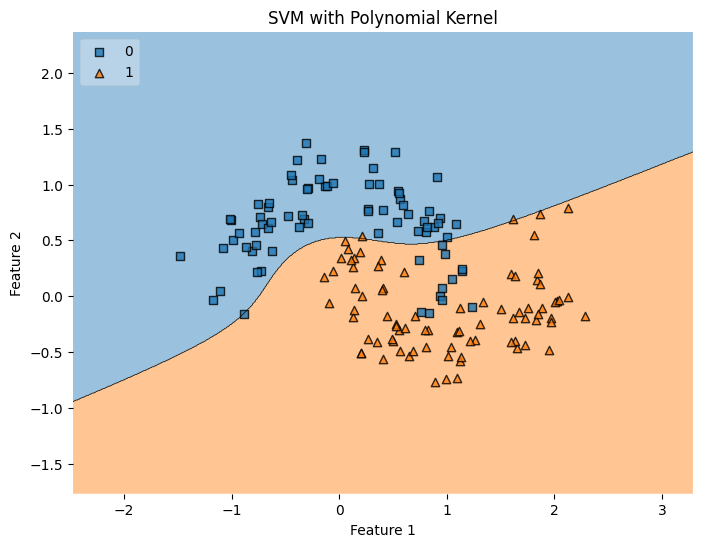

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# Load a dataset (using make_moons for better visualization)
X, y = datasets.make_moons(n_samples=200, noise=0.2, random_state=42)

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier with a polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
svm_poly.fit(X_train, y_train)

# Visualize the decision boundary
plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, clf=svm_poly, legend=2)
plt.title("SVM with Polynomial Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Q25.Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and
evaluate accuracy.

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target  # Features and labels

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naïve Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on test set
y_pred = gnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Gaussian Naïve Bayes Classifier Accuracy: {accuracy:.2f}')


Gaussian Naïve Bayes Classifier Accuracy: 0.97


Q26.: Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20
Newsgroups dataset.

In [6]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', categories=['sci.space', 'comp.graphics', 'rec.sport.hockey'], remove=('headers', 'footers', 'quotes'))
X, y = newsgroups.data, newsgroups.target

# Convert text data to numerical feature vectors
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train Multinomial Naïve Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Predict on test set
y_pred = mnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Multinomial Naïve Bayes Classifier Accuracy: {accuracy:.2f}')


Multinomial Naïve Bayes Classifier Accuracy: 0.91


Q27.Write a Python program to train an SVM Classifier with different C values and compare the decision
boundaries visually.

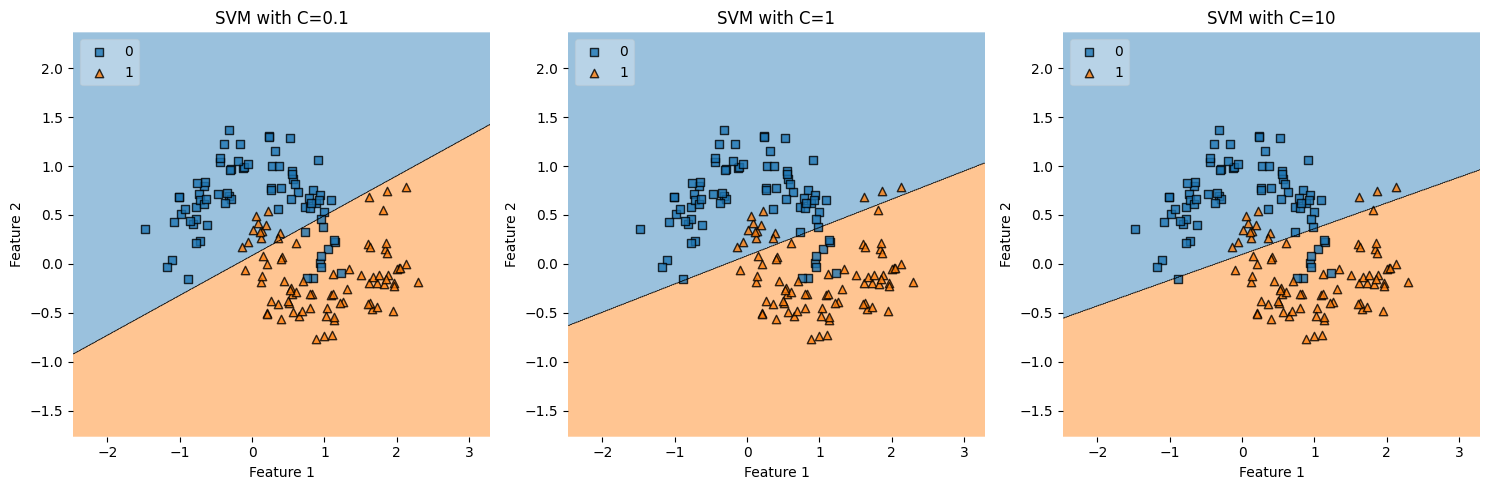

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# Load a dataset (using make_moons for better visualization)
X, y = datasets.make_moons(n_samples=200, noise=0.2, random_state=42)

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different values of C to compare
C_values = [0.1, 1, 10]

plt.figure(figsize=(15, 5))
for i, C in enumerate(C_values, 1):
    svm = SVC(kernel='linear', C=C, random_state=42)
    svm.fit(X_train, y_train)

    plt.subplot(1, len(C_values), i)
    plot_decision_regions(X_train, y_train, clf=svm, legend=2)
    plt.title(f"SVM with C={C}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


Q28.Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with
binary features.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
import numpy as np

# Generate a synthetic binary feature dataset
np.random.seed(42)
X = np.random.randint(2, size=(200, 10))  # 200 samples, 10 binary features
y = np.random.randint(2, size=200)  # Binary target variable

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bernoulli Naïve Bayes classifier
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Predict on test set
y_pred = bnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Bernoulli Naïve Bayes Classifier Accuracy: {accuracy:.2f}')


Bernoulli Naïve Bayes Classifier Accuracy: 0.65


Q29.Write a Python program to apply feature scaling before training an SVM model and compare results with
unscaled data.

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target  # Features and labels

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier without feature scaling
svm_unscaled = SVC(kernel='linear', C=1.0, random_state=42)
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier with scaled features
svm_scaled = SVC(kernel='linear', C=1.0, random_state=42)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Print results
print(f'SVM Classifier Accuracy without Scaling: {accuracy_unscaled:.2f}')
print(f'SVM Classifier Accuracy with Scaling: {accuracy_scaled:.2f}')


SVM Classifier Accuracy without Scaling: 1.00
SVM Classifier Accuracy with Scaling: 0.97


Q30.= Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and
after Laplace Smoothing.

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target  # Features and labels

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naïve Bayes classifier without Laplace Smoothing
gnb_no_smoothing = GaussianNB(var_smoothing=0)
gnb_no_smoothing.fit(X_train, y_train)
y_pred_no_smoothing = gnb_no_smoothing.predict(X_test)
accuracy_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)

# Train Gaussian Naïve Bayes classifier with Laplace Smoothing (default var_smoothing)
gnb_with_smoothing = GaussianNB()
gnb_with_smoothing.fit(X_train, y_train)
y_pred_with_smoothing = gnb_with_smoothing.predict(X_test)
accuracy_with_smoothing = accuracy_score(y_test, y_pred_with_smoothing)

# Print results
print(f'Gaussian Naïve Bayes Accuracy without Laplace Smoothing: {accuracy_no_smoothing:.2f}')
print(f'Gaussian Naïve Bayes Accuracy with Laplace Smoothing: {accuracy_with_smoothing:.2f}')


Gaussian Naïve Bayes Accuracy without Laplace Smoothing: 1.00
Gaussian Naïve Bayes Accuracy with Laplace Smoothing: 1.00


Q31.Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,
gamma, kernel).

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target  # Features and labels

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define SVM model
svm = SVC()

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Perform GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best model
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

# Predict on test set
y_pred = best_svm.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f'Best Hyperparameters: {best_params}')
print(f'SVM Classifier Accuracy with Best Parameters: {accuracy:.2f}')


Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
SVM Classifier Accuracy with Best Parameters: 1.00


Q32.Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and
check it improve accuracy.

In [12]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Load an imbalanced dataset (for example, Breast Cancer dataset)
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target  # Features and labels

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Compute class weights
target_classes = np.unique(y)
class_weights = compute_class_weight(class_weight='balanced', classes=target_classes, y=y)
class_weight_dict = {target_classes[i]: class_weights[i] for i in range(len(target_classes))}

# Train SVM classifier without class weighting
svm_unweighted = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_unweighted.fit(X_train, y_train)
y_pred_unweighted = svm_unweighted.predict(X_test)
accuracy_unweighted = accuracy_score(y_test, y_pred_unweighted)

# Train SVM classifier with class weighting
svm_weighted = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight=class_weight_dict, random_state=42)
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)

# Print results
print(f'SVM Classifier Accuracy without Class Weighting: {accuracy_unweighted:.2f}')
print(f'SVM Classifier Accuracy with Class Weighting: {accuracy_weighted:.2f}')


SVM Classifier Accuracy without Class Weighting: 0.93
SVM Classifier Accuracy with Class Weighting: 0.90


Q33.Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import pandas as pd

# Load email dataset (example: spam.csv with 'message' and 'label' columns)
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Convert text data to numerical feature vectors
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Apply TF-IDF transformation
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Train Naïve Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred = nb.predict(X_test_tfidf)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Naïve Bayes Spam Detection Accuracy: {accuracy:.2f}')


Q34.Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and
compare their accuracy.

In [16]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)

# Train Naïve Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)

# Compare accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"Naïve Bayes Accuracy: {accuracy_nb:.2f}")


SVM Accuracy: 0.97
Naïve Bayes Accuracy: 1.00


Q35.Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare
results.

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X, y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardize features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)

# Train Naïve Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)

# Compare accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"Naïve Bayes Accuracy: {accuracy_nb:.2f}")


SVM Accuracy: 1.00
Naïve Bayes Accuracy: 1.00


Q36.Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO)
strategies on the Wine dataset and compare their accuracy.

In [18]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = datasets.load_wine()
X, y = wine.data, wine.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier using One-vs-Rest (OvR) strategy
svm_ovr = SVC(kernel='linear', decision_function_shape='ovr')
svm_ovr.fit(X_train_scaled, y_train)
y_pred_ovr = svm_ovr.predict(X_test_scaled)

# Train SVM classifier using One-vs-One (OvO) strategy
svm_ovo = SVC(kernel='linear', decision_function_shape='ovo')
svm_ovo.fit(X_train_scaled, y_train)
y_pred_ovo = svm_ovo.predict(X_test_scaled)

# Compare accuracy
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

print(f"SVM OvR Accuracy: {accuracy_ovr:.2f}")
print(f"SVM OvO Accuracy: {accuracy_ovo:.2f}")


SVM OvR Accuracy: 0.97
SVM OvO Accuracy: 0.97


Q37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast
Cancer dataset and compare their accuracy.

In [19]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier with Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)

# Train SVM classifier with Polynomial kernel
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train_scaled, y_train)
y_pred_poly = svm_poly.predict(X_test_scaled)

# Train SVM classifier with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Compare accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"SVM Linear Kernel Accuracy: {accuracy_linear:.2f}")
print(f"SVM Polynomial Kernel Accuracy: {accuracy_poly:.2f}")
print(f"SVM RBF Kernel Accuracy: {accuracy_rbf:.2f}")


SVM Linear Kernel Accuracy: 0.96
SVM Polynomial Kernel Accuracy: 0.87
SVM RBF Kernel Accuracy: 0.98


Q38.Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the
average accuracy.

In [20]:
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np

# Load Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define SVM classifier with Linear kernel
svm_clf = SVC(kernel='linear')

# Perform Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = cross_val_score(svm_clf, X_scaled, y, cv=skf, scoring='accuracy')

# Compute average accuracy
average_accuracy = np.mean(accuracies)

print(f"SVM Classifier Average Accuracy (Stratified K-Fold CV): {average_accuracy:.2f}")


SVM Classifier Average Accuracy (Stratified K-Fold CV): 0.98


Q39.Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare
performance.

In [21]:
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Load Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define different prior probabilities
priors_list = [[0.3, 0.7], [0.5, 0.5], [0.7, 0.3]]

# Perform Stratified K-Fold Cross-Validation and compare performance
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for priors in priors_list:
    nb_clf = GaussianNB(priors=priors)
    accuracies = cross_val_score(nb_clf, X_scaled, y, cv=skf, scoring='accuracy')
    average_accuracy = np.mean(accuracies)
    print(f"Naïve Bayes Classifier Average Accuracy (priors={priors}): {average_accuracy:.2f}")


Naïve Bayes Classifier Average Accuracy (priors=[0.3, 0.7]): 0.93
Naïve Bayes Classifier Average Accuracy (priors=[0.5, 0.5]): 0.93
Naïve Bayes Classifier Average Accuracy (priors=[0.7, 0.3]): 0.93


Q40.Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and
compare accuracy.

In [22]:
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
import numpy as np

# Load Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Recursive Feature Elimination (RFE) with SVM
svm_clf = SVC(kernel='linear')
rfe = RFE(estimator=svm_clf, n_features_to_select=10)
X_selected = rfe.fit_transform(X_scaled, y)

# Perform Stratified K-Fold Cross-Validation and compare performance
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train and evaluate SVM classifier
accuracies_svm = cross_val_score(svm_clf, X_selected, y, cv=skf, scoring='accuracy')
average_accuracy_svm = np.mean(accuracies_svm)
print(f"SVM Classifier Average Accuracy (with RFE): {average_accuracy_svm:.2f}")

# Train and evaluate Naïve Bayes classifier without RFE
priors_list = [[0.3, 0.7], [0.5, 0.5], [0.7, 0.3]]
for priors in priors_list:
    nb_clf = GaussianNB(priors=priors)
    accuracies_nb = cross_val_score(nb_clf, X_scaled, y, cv=skf, scoring='accuracy')
    average_accuracy_nb = np.mean(accuracies_nb)
    print(f"Naïve Bayes Classifier Average Accuracy (priors={priors}): {average_accuracy_nb:.2f}")


SVM Classifier Average Accuracy (with RFE): 0.98
Naïve Bayes Classifier Average Accuracy (priors=[0.3, 0.7]): 0.93
Naïve Bayes Classifier Average Accuracy (priors=[0.5, 0.5]): 0.93
Naïve Bayes Classifier Average Accuracy (priors=[0.7, 0.3]): 0.93


Q41.Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and
F1-Score instead of accuracy.

In [23]:
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Load Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Recursive Feature Elimination (RFE) with SVM
svm_clf = SVC(kernel='linear')
rfe = RFE(estimator=svm_clf, n_features_to_select=10)
X_selected = rfe.fit_transform(X_scaled, y)

# Perform Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_svm = cross_val_predict(svm_clf, X_selected, y, cv=skf)

# Compute Precision, Recall, and F1-Score
precision = precision_score(y, y_pred_svm)
recall = recall_score(y, y_pred_svm)
f1 = f1_score(y, y_pred_svm)

print(f"SVM Classifier Precision: {precision:.2f}")
print(f"SVM Classifier Recall: {recall:.2f}")
print(f"SVM Classifier F1-Score: {f1:.2f}")


SVM Classifier Precision: 0.98
SVM Classifier Recall: 0.99
SVM Classifier F1-Score: 0.98


Q42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss
(Cross-Entropy Loss).

In [24]:
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss
import numpy as np

# Load Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Naïve Bayes classifier
nb_clf = GaussianNB()

# Perform Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_proba_nb = cross_val_predict(nb_clf, X_scaled, y, cv=skf, method='predict_proba')

# Compute Log Loss (Cross-Entropy Loss)
log_loss_value = log_loss(y, y_pred_proba_nb)

print(f"Naïve Bayes Classifier Log Loss: {log_loss_value:.2f}")


Naïve Bayes Classifier Log Loss: 0.78


Q43.Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

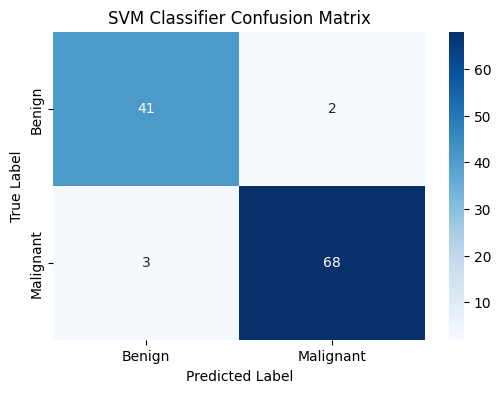

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Load Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Visualize Confusion Matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Classifier Confusion Matrix')
plt.show()


Q44.Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute
Error (MAE) instead of MSE.

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Load Diabetes dataset (regression task)
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM Regressor
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_svr)

print(f"SVM Regressor Mean Absolute Error: {mae:.2f}")


SVM Regressor Mean Absolute Error: 56.03


Q45.Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC
score.

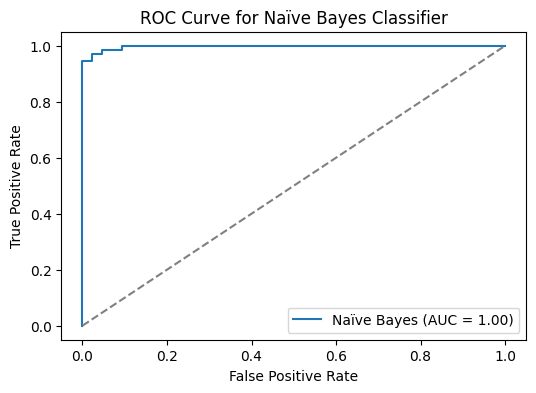

Naïve Bayes Classifier ROC-AUC Score: 1.00


In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve

# Load Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Naïve Bayes Classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train_scaled, y_train)
y_pred_proba_nb = nb_clf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba_nb)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_nb)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Naïve Bayes (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naïve Bayes Classifier')
plt.legend()
plt.show()

print(f"Naïve Bayes Classifier ROC-AUC Score: {roc_auc:.2f}")


Q46.Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

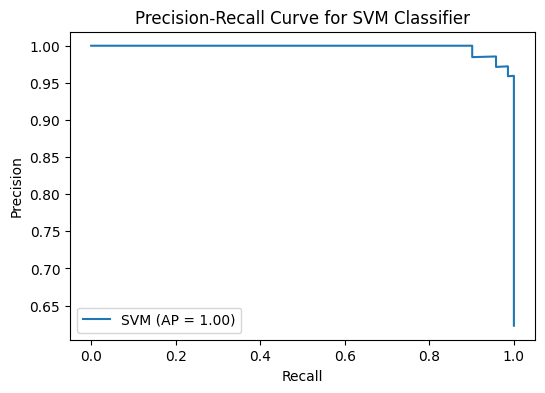

SVM Classifier Average Precision Score: 1.00


In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM Classifier
svm_clf = SVC(kernel='linear', probability=True)
svm_clf.fit(X_train_scaled, y_train)
y_pred_proba_svm = svm_clf.predict_proba(X_test_scaled)[:, 1]

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_svm)
avg_precision = average_precision_score(y_test, y_pred_proba_svm)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'SVM (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM Classifier')
plt.legend()
plt.show()

print(f"SVM Classifier Average Precision Score: {avg_precision:.2f}")
